## Tensor loading and polyfit

(0.0, 0.0)
(1.0, 1.2)
(2.0, 0.89999998)
(3.0, 0.2)
(4.0, -0.80000001)
(5.0, -1.0)


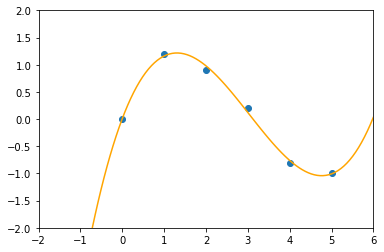

In [37]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# load tensors
x,y = torch.load('xs.pt'),torch.load('ys.pt')
x_np = x.numpy()
y_np = y.numpy()

# tensor to numpy.array
for i in range(len(x_np)):
    xy_tuple = tuple([x_np[i],np.round_(y_np[i],2)])
    print(xy_tuple)
plt.figure(figsize=(6,4))
plt.plot(x_np,y_np,'o')
plt.xlim(-2,6)
plt.ylim(-2,2)

# ployfit points
poly = np.polyfit(x_np,y_np,deg=3)
p = np.poly1d(poly)
x=np.linspace(-1,6,100)
plt.plot(x,p(x),'orange')
plt.show()

## Using numpy to create tensor

In [38]:
import torch
import numpy as np

a = np.arange(10.,50.,1.)
a_pt = torch.from_numpy(a)
b_pt = torch.reshape(a_pt,(1,-1))
print(b_pt.float())
print(torch.min(b_pt).float())
print(torch.max(b_pt).float())

tensor([[10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.,
         24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37.,
         38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.]])
tensor(10.)
tensor(49.)


## Convolution

In [41]:
import torch
import numpy as np
import matplotlib.pyplot as plt


def convolution(param1,param2):
    
    # cast exception
    if np.shape(param1)[1] != np.shape(param1)[2] and np.shape(param2)[1] != np.shape(param2)[2]:
        return []
    
    # definite variables
    num = np.shape(param1)[0]
    len1 = np.shape(param1)[1]
    len2 = np.shape(param2)[1]
    len3 = len1-len2+1
    matrix = np.zeros((len3,len3))
    
    # iter begin 
    for i in range(len3):
        for j in range(len3):
            val = 0
            ## >=3 inputs and cores
            for n in range(num):
                val += sum(sum(np.multiply(param1[n,i:i+len2,j:j+len2],param2[n])))
                matrix[i,j] = val
    
    return matrix


# 3D-matrix definition
input1 = np.array([[0,0,0,0,0,0,0],[0,1,0,1,2,1,0],[0,0,2,1,0,1,0],
                   [0,1,1,0,2,0,0],[0,2,2,1,1,0,0],[0,2,0,1,2,0,0],[0,0,0,0,0,0,0]])
input2 = np.array([[0,0,0,0,0,0,0],[0,2,0,2,1,1,0],[0,0,1,0,0,2,0],
                   [0,1,0,0,2,1,0],[0,1,1,2,1,0,0],[0,1,0,1,1,1,0],[0,0,0,0,0,0,0]])
input_mat = np.array([input1,input2])
core1= np.array([[1,0,1],[-1,1,0],[0,-1,0]])
core2= np.array([[-1,0,1],[0,0,1],[1,1,1]])
core_mat = np.array([core1,core2])

# get result
res = convolution(input_mat,core_mat)
print("\n\nInput matrices:\n\n")
print(input_mat)
print("\n\nCore matrices:\n\n")
print(core_mat)
print("\n\nConvolution result:\n\n")
print(res)




Input matrices:


[[[0 0 0 0 0 0 0]
  [0 1 0 1 2 1 0]
  [0 0 2 1 0 1 0]
  [0 1 1 0 2 0 0]
  [0 2 2 1 1 0 0]
  [0 2 0 1 2 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 2 0 2 1 1 0]
  [0 0 1 0 0 2 0]
  [0 1 0 0 2 1 0]
  [0 1 1 2 1 0 0]
  [0 1 0 1 1 1 0]
  [0 0 0 0 0 0 0]]]


Core matrices:


[[[ 1  0  1]
  [-1  1  0]
  [ 0 -1  0]]

 [[-1  0  1]
  [ 0  0  1]
  [ 1  1  1]]]


Convolution result:


[[ 2.  0.  2.  4.  0.]
 [ 1.  4.  4.  3.  5.]
 [ 4.  3.  5.  9. -1.]
 [ 3.  4.  6.  2.  1.]
 [ 5.  3.  5.  1. -2.]]
